In [147]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from pandas_datareader import data
import numpy as np
from dateutil import parser
from pandas_datareader import data as pdr
import yfinance as yf

Fetch Data from Yahoo Finance

In [150]:
start_date = '2002-05-01'
end_date = '2022-12-18'

sp500_data = yf.Ticker('^GSPC').history(period="1d", start=start_date, end=end_date)



In [151]:
sp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-05-01 00:00:00-04:00,1076.920044,1088.319946,1065.290039,1086.459961,1451400000,0,0
2002-05-02 00:00:00-04:00,1086.459961,1091.420044,1079.459961,1084.560059,1364000000,0,0
2002-05-03 00:00:00-04:00,1084.560059,1084.560059,1068.890015,1073.430054,1284500000,0,0
2002-05-06 00:00:00-04:00,1073.430054,1075.959961,1052.650024,1052.670044,1122600000,0,0
2002-05-07 00:00:00-04:00,1052.670044,1058.670044,1048.959961,1049.489990,1354700000,0,0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,0,0
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0,0
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0,0


In [51]:
# sp500_weekly = sp500_data["Adj Close"].resample('W').ohlc().drop(['open', 'high', 'low'], axis=1)
# sp500_weekly.rename(columns = {"close": "Adj Close"}, inplace=True)
# sp500_weekly['return'] = sp500_weekly['Adj Close'].pct_change()


## Calculate Monthly Realised Volatility

In [153]:
window = 21  # trading days in rolling window
days_per_year = 252    # trading days per year
ann_factor = days_per_year / window
df = sp500_data
df['log_return'] = np.log(df['Close']).diff()

# Var Swap (returns are not demeaned)
df['real_var'] = np.square(df['log_return']).rolling(window).sum() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

# Classical (returns are demeaned, dof=1)
df['real_var'] = df['log_return'].rolling(window).var() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log_return,real_var,real_vol
Date,,,,,,,,,,
2002-05-01 00:00:00-04:00,1076.920044,1088.319946,1065.290039,1086.459961,1451400000,0,0,NaN,NaN,NaN
2002-05-02 00:00:00-04:00,1086.459961,1091.420044,1079.459961,1084.560059,1364000000,0,0,-0.001750,NaN,NaN
2002-05-03 00:00:00-04:00,1084.560059,1084.560059,1068.890015,1073.430054,1284500000,0,0,-0.010315,NaN,NaN
2002-05-06 00:00:00-04:00,1073.430054,1075.959961,1052.650024,1052.670044,1122600000,0,0,-0.019529,NaN,NaN
2002-05-07 00:00:00-04:00,1052.670044,1058.670044,1048.959961,1049.489990,1354700000,0,0,-0.003026,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,0,0,0.014178,0.001558,0.039474
2022-12-13 00:00:00-05:00,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0,0,0.007263,0.001540,0.039242
2022-12-14 00:00:00-05:00,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0,0,-0.006071,0.001512,0.038889


## Distribution of S&P Log returns

<AxesSubplot: title={'center': 'S&P Log Returns'}, xlabel='Date'>

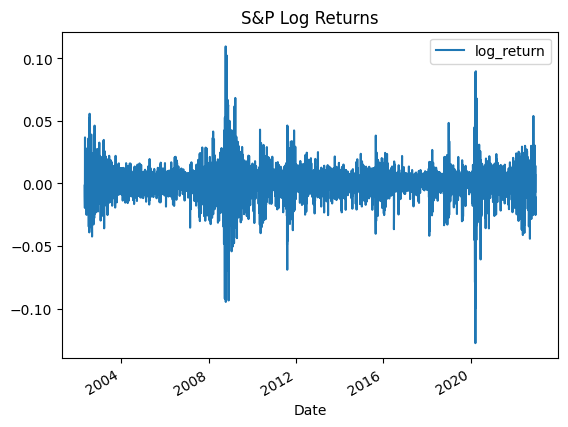

In [154]:
df.plot(y='log_return', title="S&P Log Returns")

<AxesSubplot: title={'center': 'Realised S&P volatility'}, xlabel='Date'>

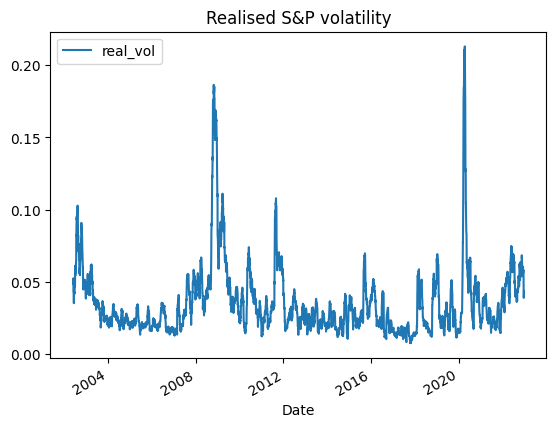

In [155]:
df.plot(y='real_vol', title="Realised S&P volatility")

<AxesSubplot: ylabel='Frequency'>

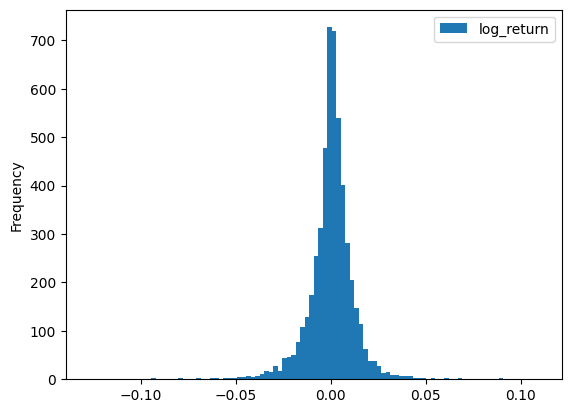

In [156]:
df.plot(y='log_return', kind='hist', bins=100)

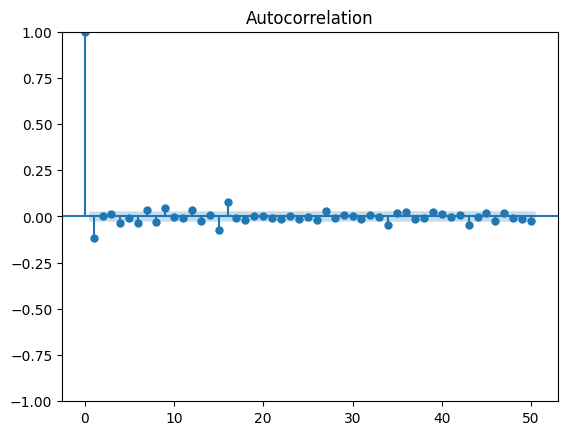

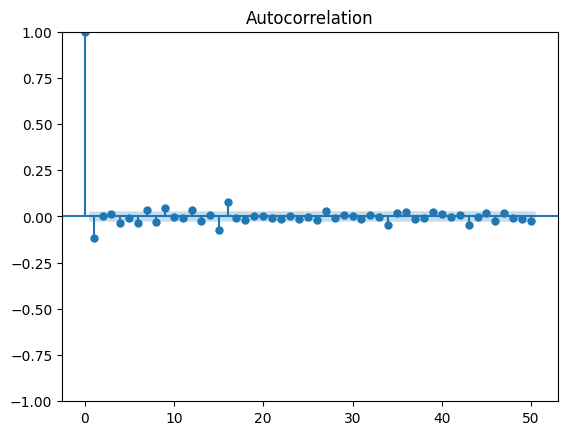

In [157]:
plot_acf(x=df["log_return"].dropna().values.squeeze(), lags=50)

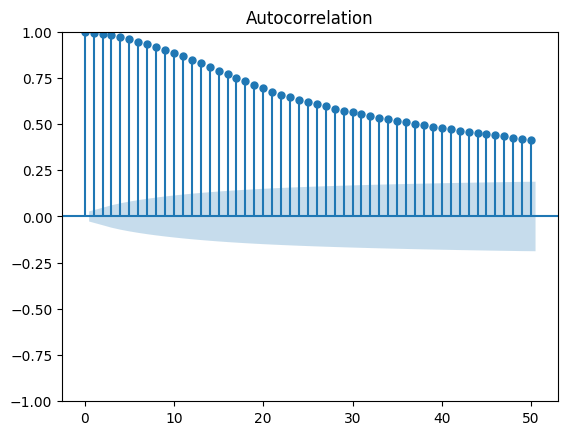

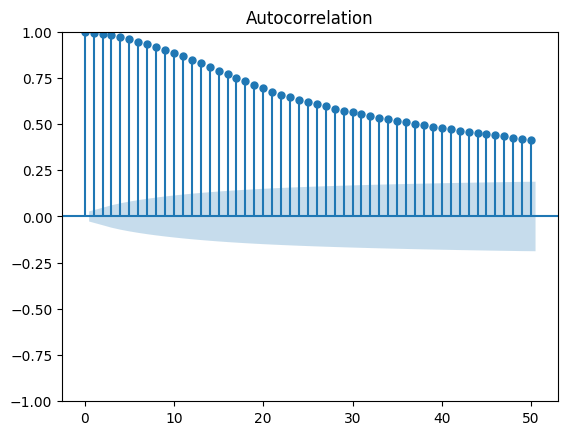

In [158]:
plot_acf(x=df["real_vol"].dropna().values.squeeze(), lags=50)


2022-12-18 00:00:00


<AxesSubplot: xlabel='DATE'>

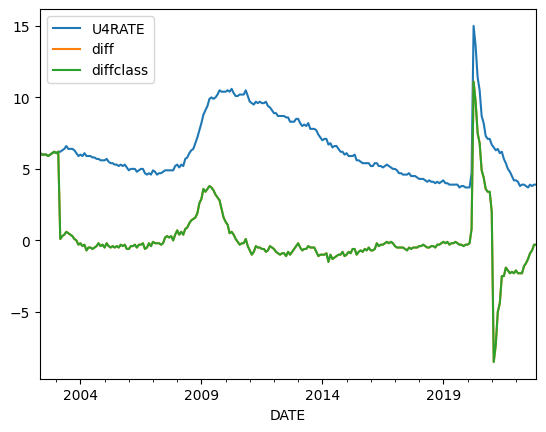

In [159]:
start = parser.parse(start_date)
end =  parser.parse(end_date)
print(end)

fred = pdr.DataReader('U4RATE', 'fred', start, end)

# U4RATE,  Total Unemployed Plus Discouraged Workers, as a Percent of the Civilian Labor Force Plus Discouraged Workers

import numpy as np

diff_kernel = np.array([1,0,0,0,0,0,0,0,0,0,-1])
diff = np.convolve(fred["U4RATE"], diff_kernel)

#ignore the extra indexes from the convolution 
diff = diff[0 :np.size(diff)-np.size(diff_kernel)+1] 


fred["diff"] = diff
fred["diffclass"] = diff

fred.plot()


<AxesSubplot: xlabel='DATE'>

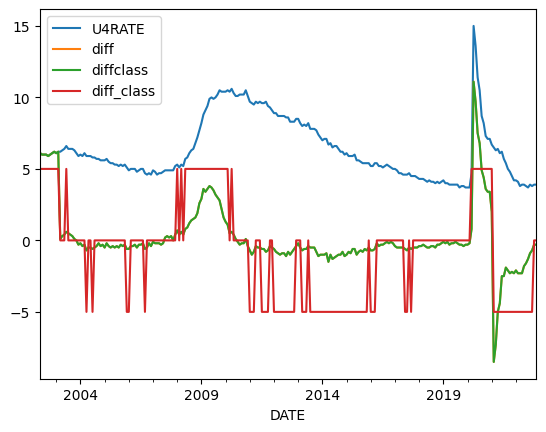

In [160]:
def u4class(x):
    if x < -0.5:
        return -1
    elif x > 0.5: 
        return 1
    else:
        return 0

fred["diff_class"] = np.vectorize(u4class)(diff)*5

fred.plot()

In [191]:
data = pdr.DataReader(['T10Y2Y', 'U4RATE'], 'fred', start, end)
data['U4RATE'].ffill(inplace=True)
diff_yoy_kernel = np.zeros(360)
diff_yoy_kernel[0] = -1
diff_yoy_kernel[-1] = 1
data["T10Y2Y"] = data["T10Y2Y"].ffill()
diff = data["T10Y2Y"].rolling(window=np.size(diff_yoy_kernel)).apply(lambda x: np.sum(diff_yoy_kernel * x))
print(len(diff))
data['BondTrend'] = diff

5454


In [181]:
def removeTz(x):
        return x.replace(tzinfo=None)

sp500_data["DATE"] = np.vectorize(removeTz)(sp500_data.index)


,DATE,T10Y2Y,U4RATE,BondTrend,Open,High,Low,Close,Volume,Dividends,Stock Splits,log_return,real_var,real_vol
0,2002-05-01,1.87,6.1,NaN,1076.920044,1088.319946,1065.290039,1086.459961,1451400000,0,0,NaN,NaN,NaN
1,2002-05-02,1.88,6.1,NaN,1086.459961,1091.420044,1079.459961,1084.560059,1364000000,0,0,-0.001750,NaN,NaN
2,2002-05-03,1.91,6.1,NaN,1084.560059,1084.560059,1068.890015,1073.430054,1284500000,0,0,-0.010315,NaN,NaN
3,2002-05-06,1.91,6.1,NaN,1073.430054,1075.959961,1052.650024,1052.670044,1122600000,0,0,-0.019529,NaN,NaN
4,2002-05-07,1.95,6.1,NaN,1052.670044,1058.670044,1048.959961,1049.489990,1354700000,0,0,-0.003026,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2022-12-12,-0.78,3.9,-1.83,3939.290039,3990.709961,3935.300049,3990.560059,3904130000,0,0,0.014178,0.001558,0.039474
5192,2022-12-13,-0.71,3.9,-1.74,4069.379883,4100.959961,3993.030029,4019.649902,5079360000,0,0,0.007263,0.001540,0.039242
5193,2022-12-14,-0.74,3.9,-1.76,4015.540039,4053.760010,3965.649902,3995.320068,4472340000,0,0,-0.006071,0.001512,0.038889
5194,2022-12-15,-0.79,3.9,-1.81,3958.370117,3958.370117,3879.449951,3895.750000,4493900000,0,0,-0.025237,0.001835,0.042838


<AxesSubplot: xlabel='DATE'>

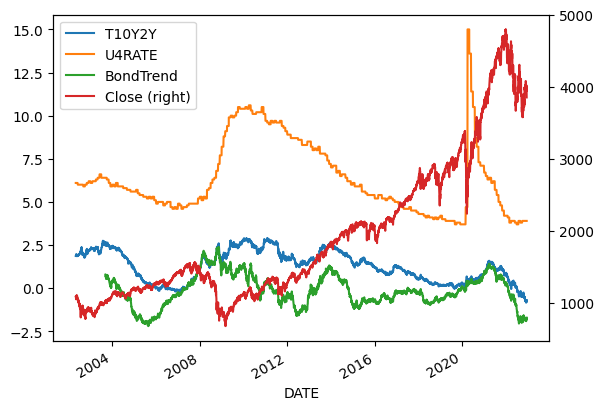

In [190]:
data2 = pd.merge(data, sp500_data[["DATE", "Close"]], how='inner', on="DATE")
data2.set_index("DATE", inplace=True)
data2.plot(secondary_y=['Close'])

In [142]:
bond = data["T10Y2Y"].ffill()

